In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

import warnings 
warnings.filterwarnings(action='ignore')
                        
                        
            

### Характеристики набора данных:

#### Количество экземпляров  20640

Количество атрибутов  8 числовых, прогнозных атрибутов и цель

Информация об атрибутах:

- Медианный доход MedInc в блоке
- HouseAge средний возраст дома в блоке
- Среднее количество комнат в AveRooms
- Среднее количество спален AveBedrms
- Население блока населения
- Средняя заполняемость дома AveOccup
- Широта дома блок широта
- Долгота долгота блока дома


Отсутствующие значения атрибутов Нет

Этот набор данных был получен из репозитория StatLib. http://lib.stat.cmu.edu/datasets/

Целевая переменная — это средняя стоимость дома для округов Калифорнии.

Этот набор данных был получен из переписи населения США 1990 года с использованием одной строки на каждую блочную группу переписи. Блочная группа — это наименьшая географическая единица, для которой Бюро переписи США публикует выборочные данные (блочная группа обычно насчитывает от 600 до 3000 человек).

Его можно скачать / загрузить с помощью ```sklearn.datasets.fetch_california_housing``` функции.

In [115]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

df = pd.DataFrame(data['data'])
df.columns = data['feature_names']
df['target'] = data['target']
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [116]:
df.info()

discrete_vars = [df.HouseAge]
continues_vars = [df.MedInc, df.AveRooms, df.AveBedrms, df.Population, df.AveOccup, df.Latitude, df.Longitude, df.target]
continues_vars = [k.name for k in continues_vars]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


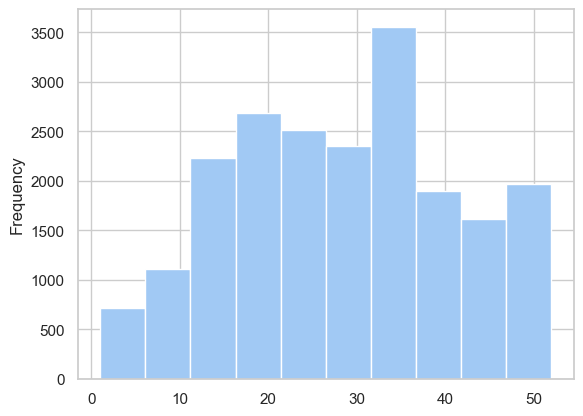

In [117]:
# построение гистрограммы для дискретной величины
for d in discrete_vars:
    d.plot(kind="hist")

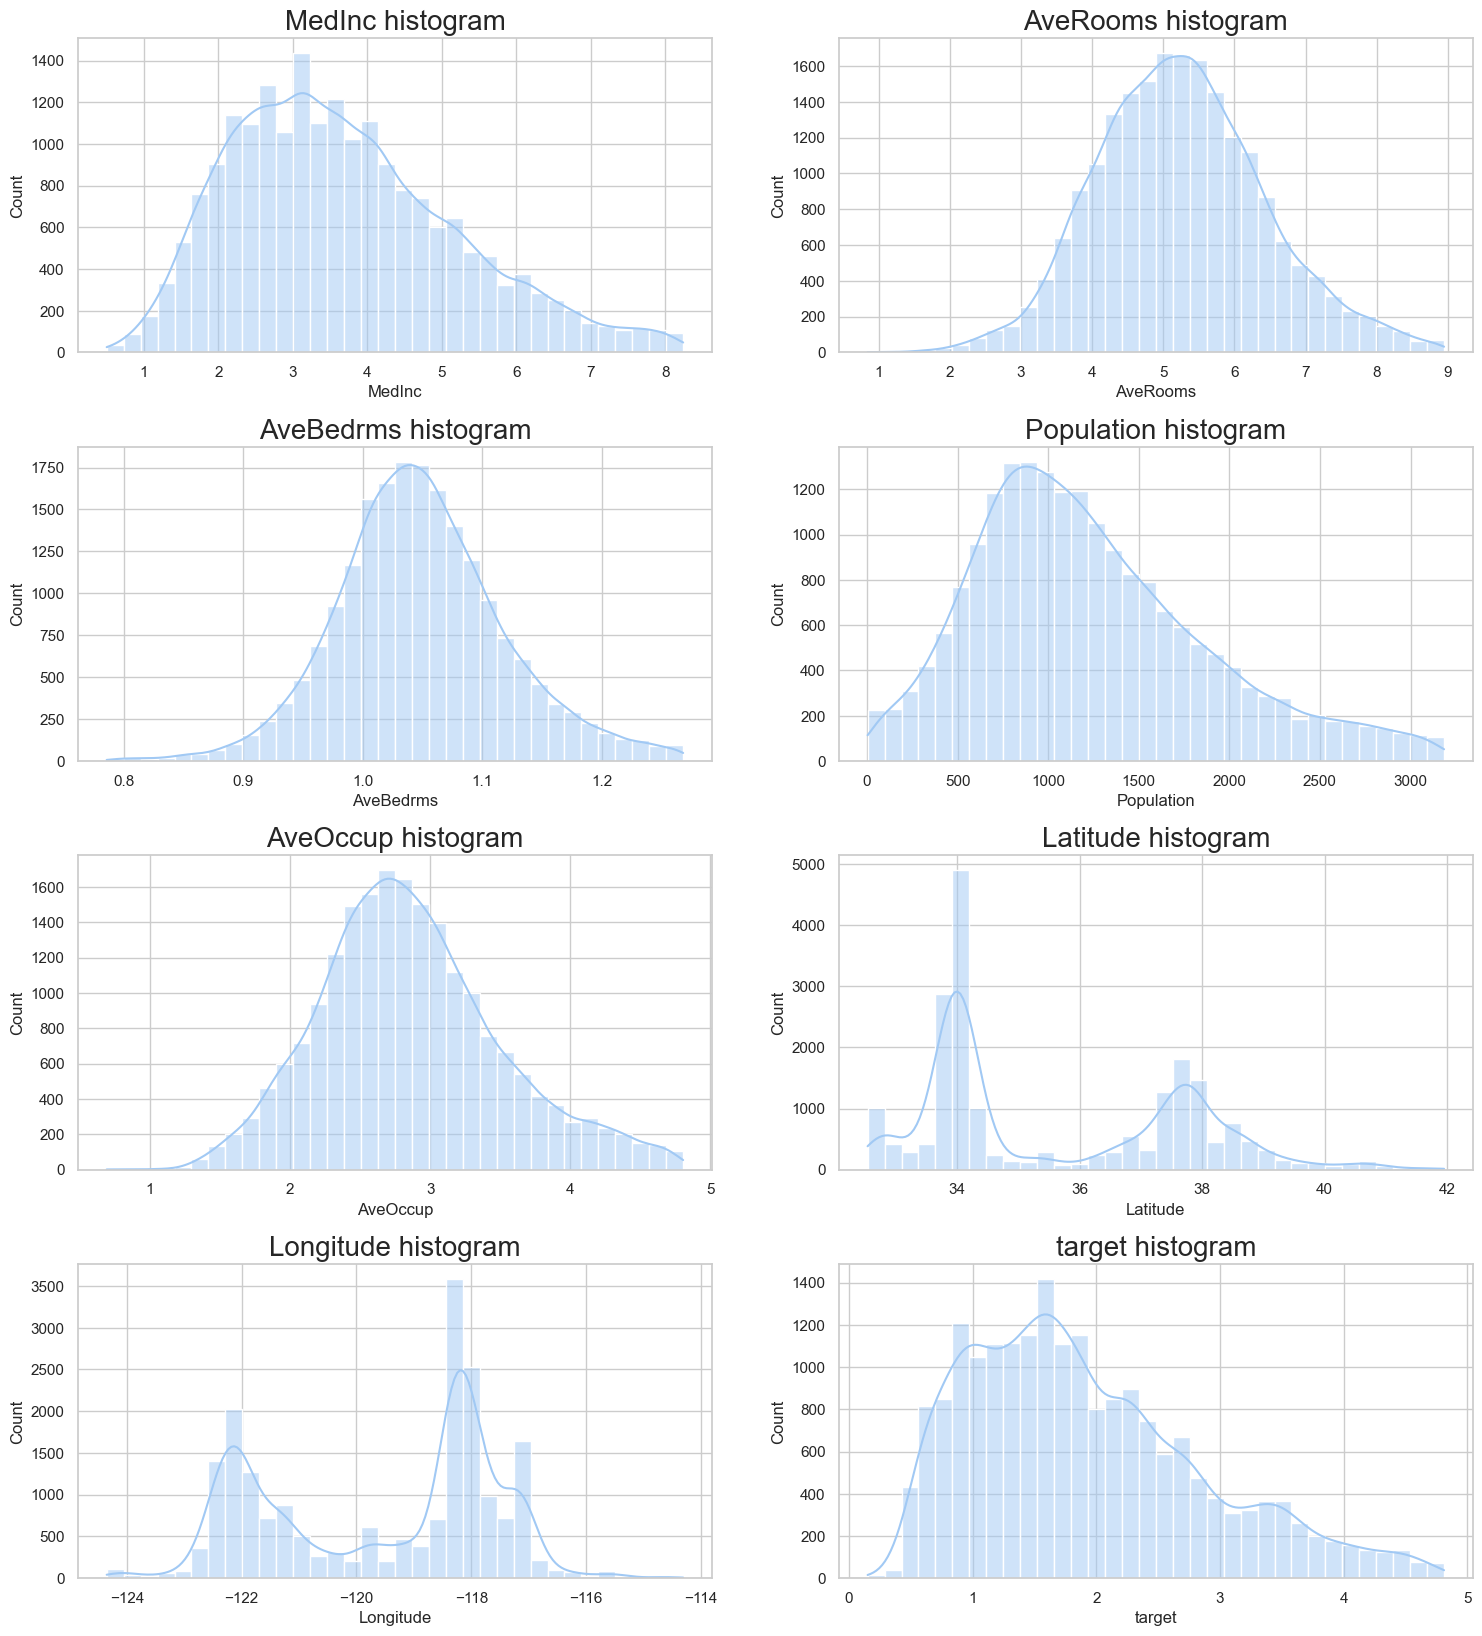

In [118]:
def bins_count(df):
    rows = df.shape[0]
    return np.around(1+3.32*np.log(rows)).astype('int64')

plt.figure(figsize=(18,20))

def cut_tails(data, _min, _max):
    qmax, qmin = np.percentile(df[data], [_max, _min])
    interval = qmax - qmin
    min_dist = qmin - (1.5 * interval)
    max_dist = qmax + (1.5 * interval)
    df.loc[(df[data] < min_dist) | (df[data] > max_dist), (data)] = np.nan
    
    
for i in continues_vars:
    cut_tails(i, 10, 70)
    plt.subplot(4,2,continues_vars.index(i)+1)
    plt.subplots_adjust(hspace=0.3)
    plt.title(i + ' histogram', fontsize=20)
    sns.histplot(data=df, x=i, kde=True, bins=bins_count(df))

In [119]:
df[continues_vars].describe()

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20048.000000,20310.000000,19531.000000,19499.00000,20185.000000,20640.000000,20640.000000,19566.000000
mean,3.677130,5.254100,1.048622,1231.99841,2.863498,35.631861,-119.569704,1.908077
std,1.514590,1.195016,0.070765,648.89966,0.655685,2.135952,2.003532,0.953779
min,0.499900,0.846154,0.785714,3.00000,0.692308,32.540000,-124.350000,0.149990
25%,2.539725,4.426699,1.003914,768.00000,2.421296,33.930000,-121.800000,1.162000
50%,3.479550,5.203932,1.044737,1124.00000,2.802521,34.260000,-118.490000,1.731500
75%,4.616700,6.000000,1.090047,1602.00000,3.243056,37.710000,-118.010000,2.466750
max,8.237500,8.946759,1.268156,3185.00000,4.805195,41.950000,-114.310000,4.813000


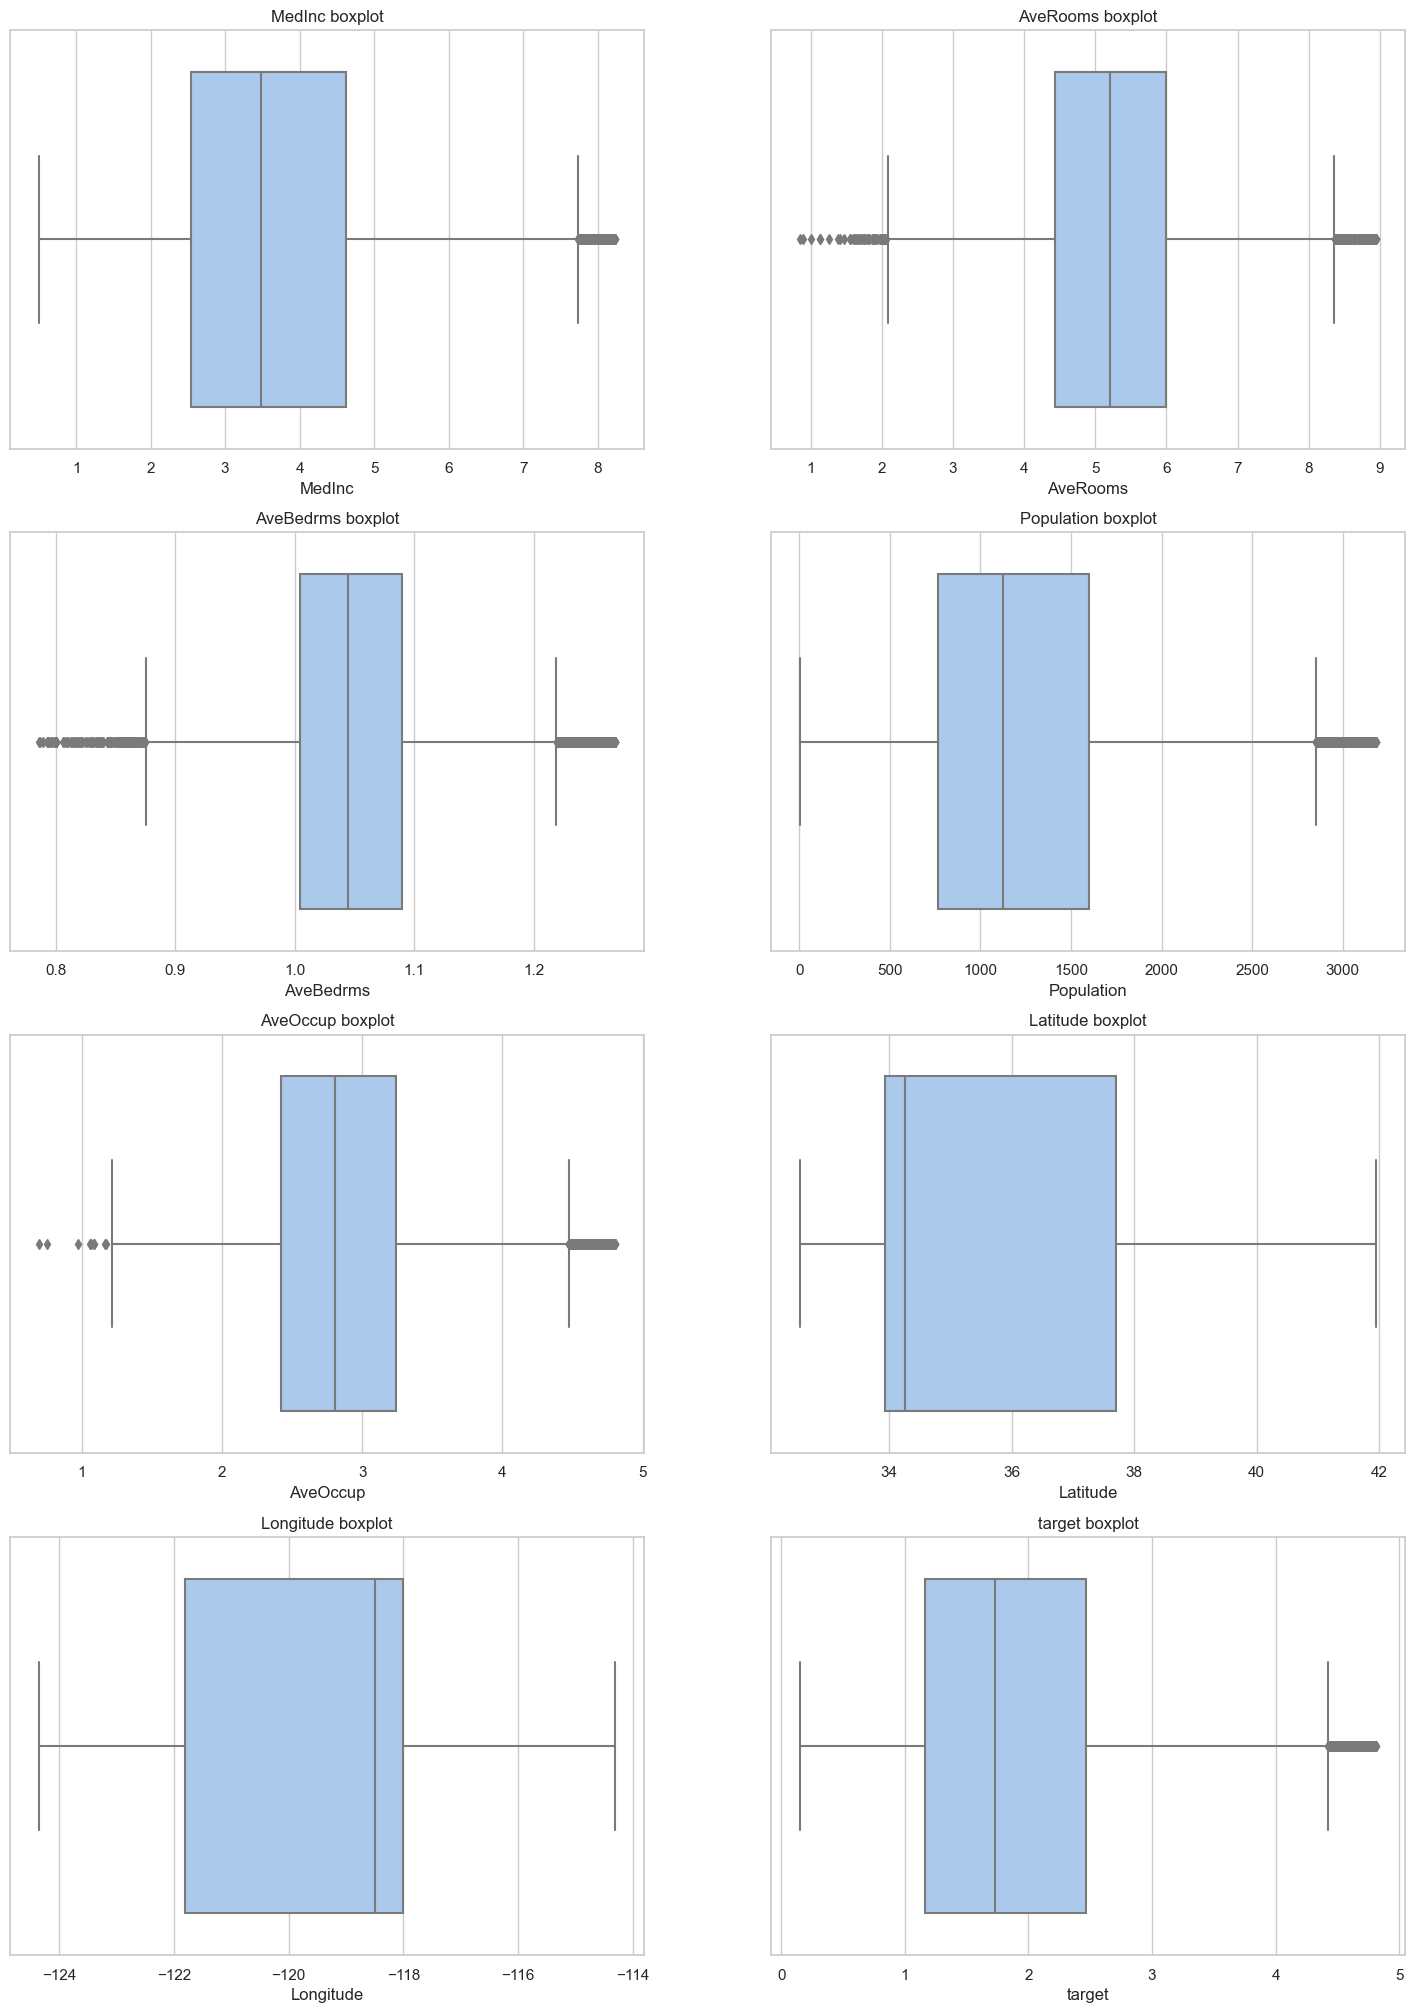

In [120]:
plt.figure(figsize=(18,25))

for d in continues_vars:
    plt.subplot(4,2, continues_vars.index(d)+1)
    plt.title(d + " boxplot")
    sns.boxplot(data=df, x=d)

<AxesSubplot:>

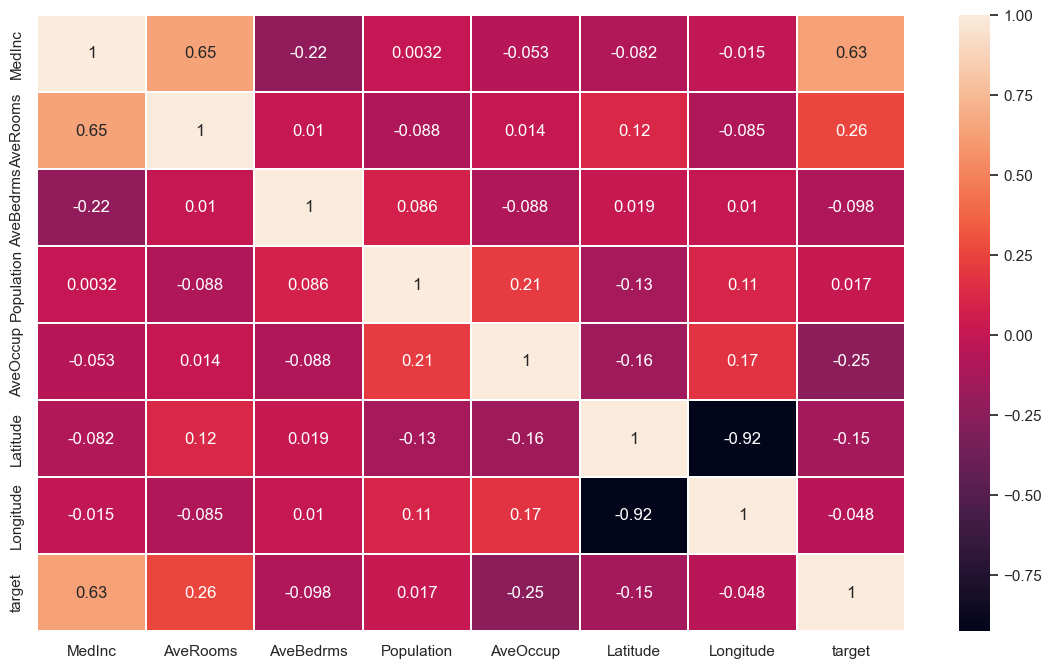

In [121]:
plt.figure(figsize=(14,8))
sns.heatmap(df[continues_vars].corr(),annot=True, linewidths=0.25)

<Figure size 1800x1200 with 0 Axes>

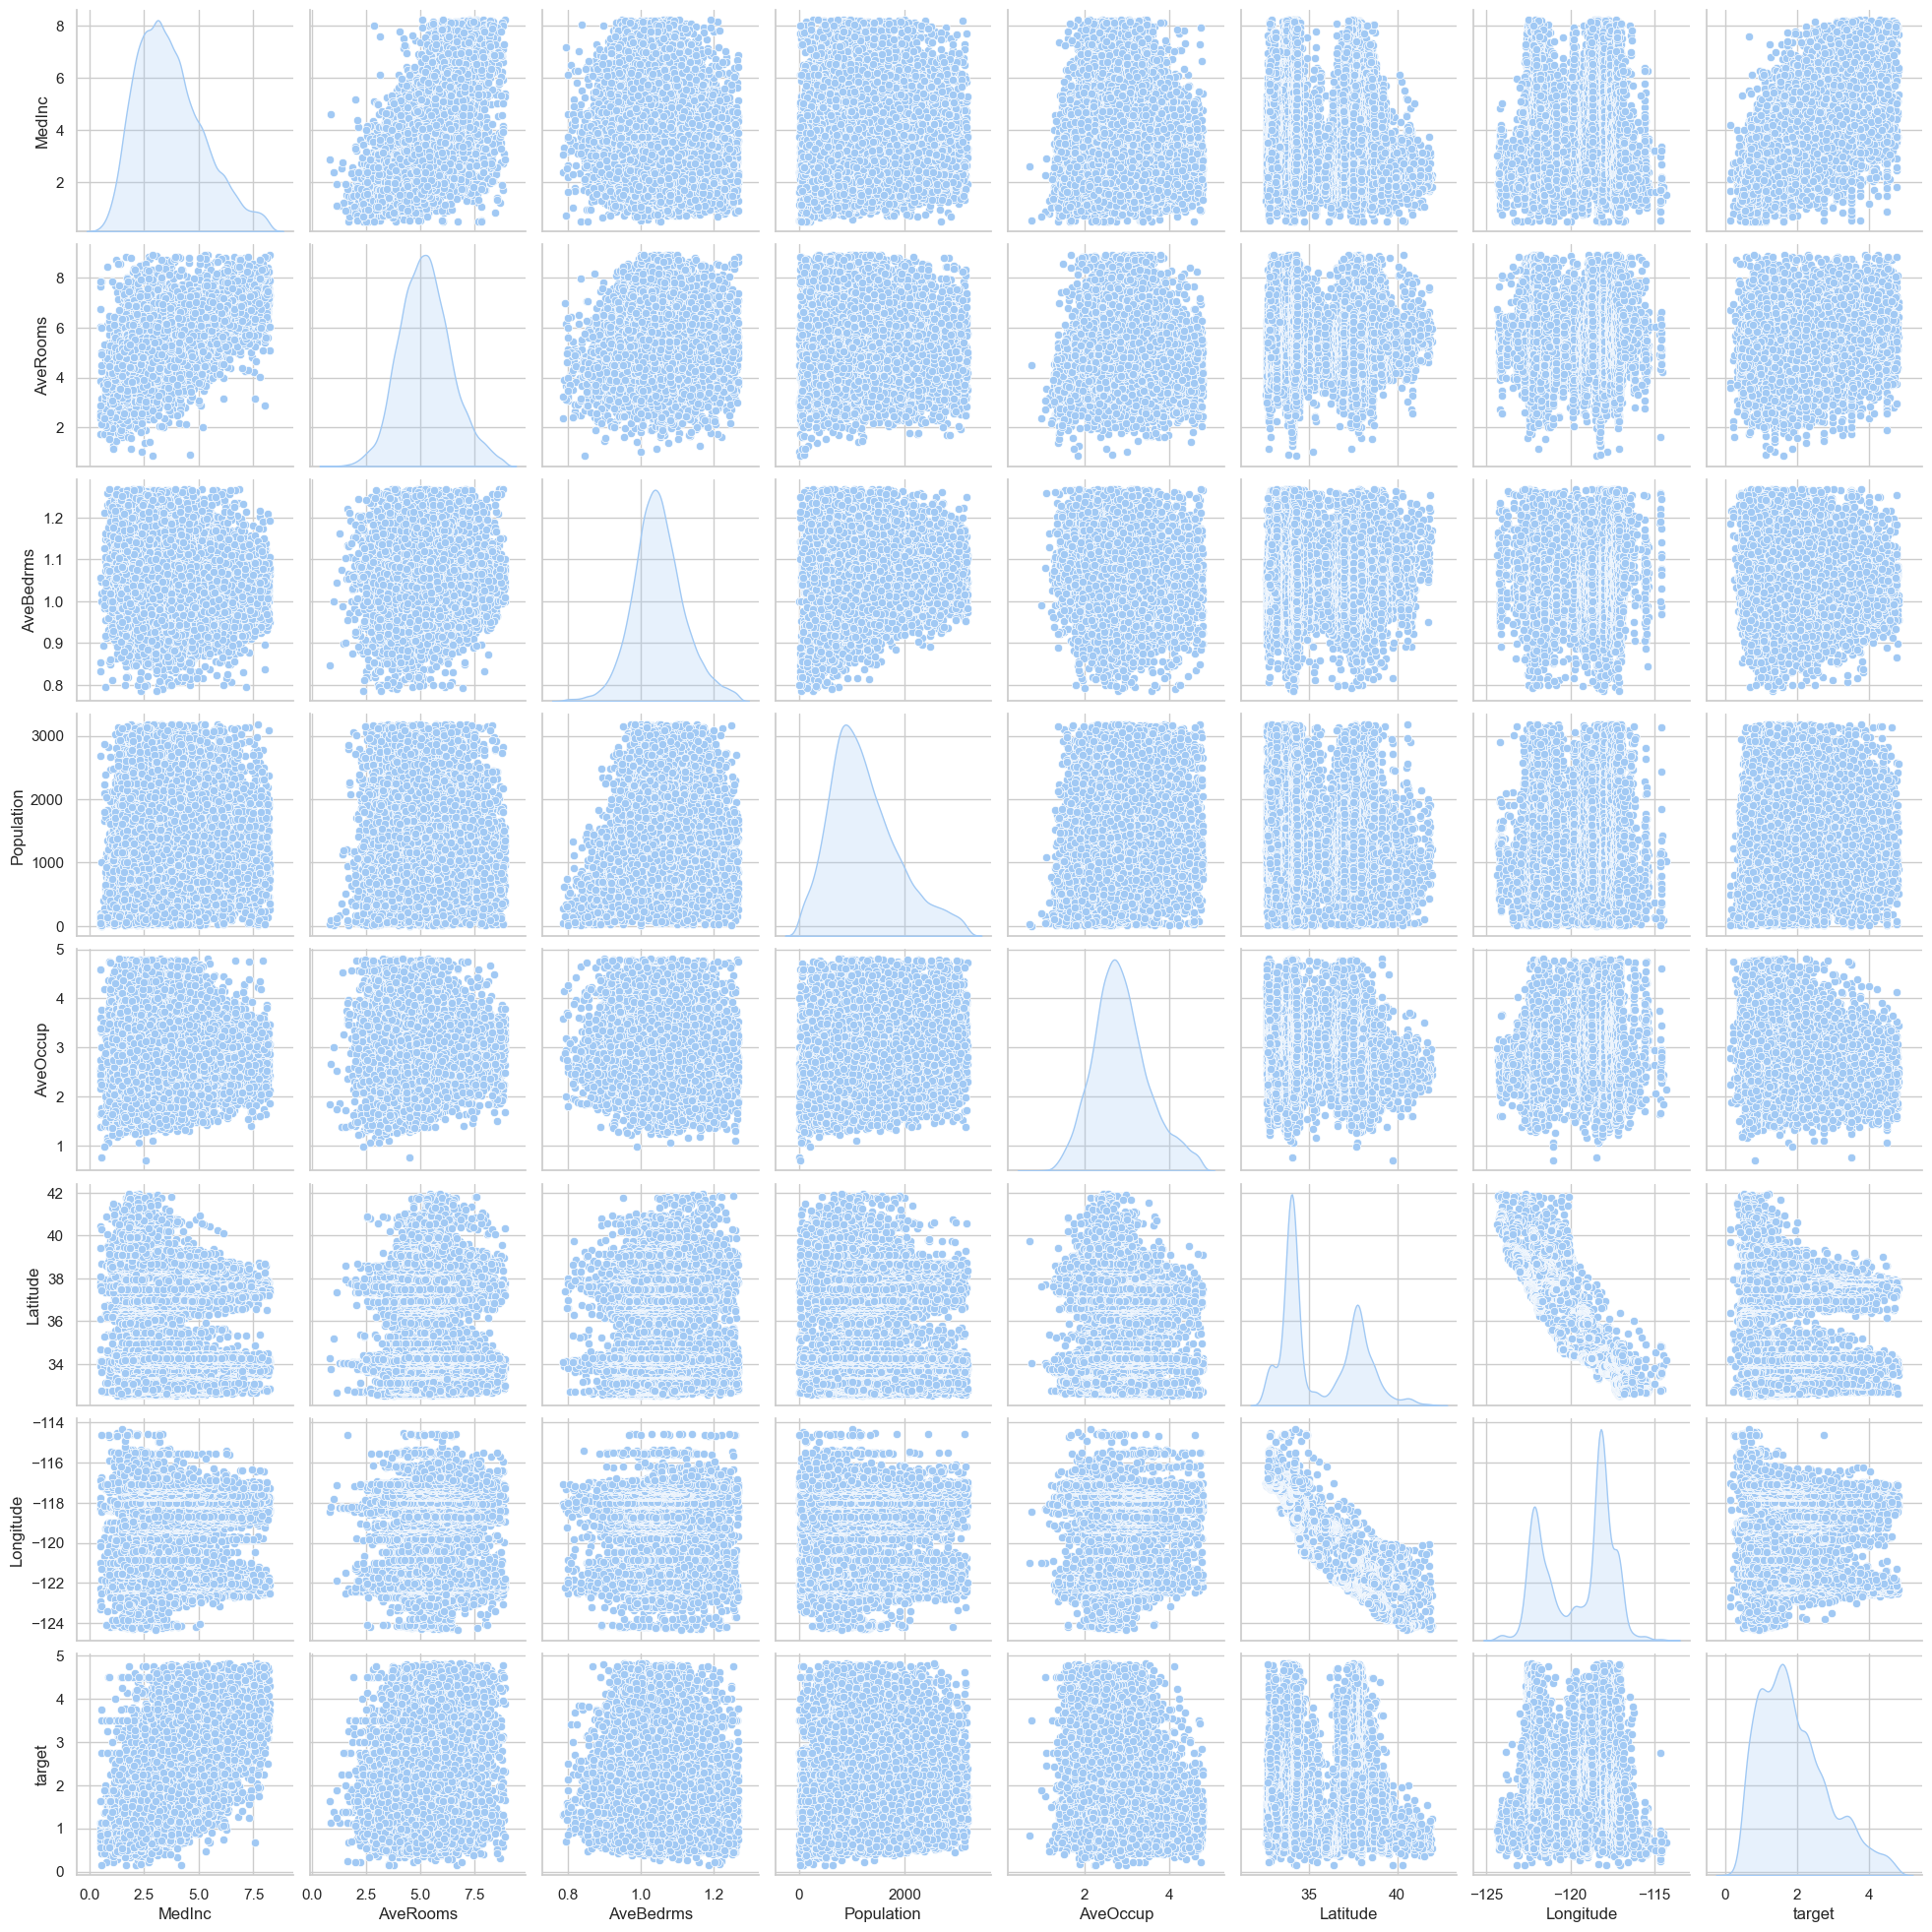

In [122]:
plt.figure(figsize=(18,12))

sns.pairplot(df[continues_vars], diag_kind='kde')

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

In [264]:
df = df.dropna()[:1000]
X = df.drop("target", axis=1)
y = df['target'].tolist()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Линейная регрессия

In [265]:
lregressor = LinearRegression()

lregressor.fit(x_train, y_train)

y_lr_predict = lregressor.predict(x_test)

mae = mean_absolute_error(y_test, lregressor.predict(x_test))
mse = mean_squared_error(y_test, lregressor.predict(x_test))
r2 = r2_score(y_test, lregressor.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 0.300
Mean Squared Error: 0.174
R2 Score: 0.725


## Ridge регрессия

In [285]:
# Подбор параметра alpha

alphas = 200

r_alphas = np.logspace(-10, 20, alphas)

r_cv = RidgeCV(alphas=r_alphas,
               scoring='neg_mean_squared_error',
               cv=3
               )
r_cv.fit(x_train, y_train)


print(r_cv.alpha_)


# Регрессия
r = Ridge(alpha=r_cv.alpha_)
r.fit(x_train, y_train)

y_predict = r.predict(x_test)

mae_ridge = mean_absolute_error(y_test, r.predict(x_test))
mse_ridge = mean_squared_error(y_test, r.predict(x_test))
r2_ridge = r2_score(y_test, r.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae_ridge))
print('Mean Squared Error: {:.3f}'.format(mse_ridge))
print('R2 Score: {:.3f}'.format(r2_ridge))

3.5707859649004554
Mean Absolute Error: 0.301
Mean Squared Error: 0.175
R2 Score: 0.724


## Lasso Регрессия

In [ ]:
alphas = 200
r_alphas = np.logspace(-10, 20, alphas)

r_cv = LassoCV(alphas=r_alphas,
              random_state=17,
               cv=3
               )
r_cv.fit(x_train, y_train)


print(r_cv.alpha_)

lasso = Lasso(alpha=r_cv.alpha_)
lasso.fit(x_train, y_train)

y_predict = lasso.predict(x_test)

mae_ridge = mean_absolute_error(y_test, lasso.predict(x_test))
mse_ridge = mean_squared_error(y_test, lasso.predict(x_test))
r2_ridge = r2_score(y_test, lasso.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae_ridge))
print('Mean Squared Error: {:.3f}'.format(mse_ridge))
print('R2 Score: {:.3f}'.format(r2_ridge))



In [286]:
elastic = ElasticNet()
elastic.fit(x_train, y_train)

mae = mean_absolute_error(y_test, elastic.predict(x_test))
mse = mean_squared_error(y_test, elastic.predict(x_test))
r2 = r2_score(y_test, elastic.predict(x_test))

print('Mean Absolute Error: {:.3f}'.format(mae))
print('Mean Squared Error: {:.3f}'.format(mse))
print('R2 Score: {:.3f}'.format(r2))

Mean Absolute Error: 0.515
Mean Squared Error: 0.418
R2 Score: 0.341


#### Доверительный интервал результатов регрессии

In [ ]:
def calc_interval(y_predict, model):
    res = pd.DataFrame(columns = ['value', 'bot_bound', 'top_bound'])
    bot_list = []
    top_list = []
    n = len(y_predict)
    p = len(model.coef_) + 1
    scale = ((y_predict - y_test)**2).sum()/n
    
    for k in y_predict:
        conf_int = scipy.stats.t.interval(0.05, df=n-p, loc=k, scale=scale)
        bot_list.append(conf_int[0])
        top_list.append(conf_int[1])
        
    res['value'] = y_predict
    res['bot_bound'] = bot_list
    res['top_bound'] = top_list
    
    return res

In [ ]:
calc_interval(y_lr_predict, lregressor)

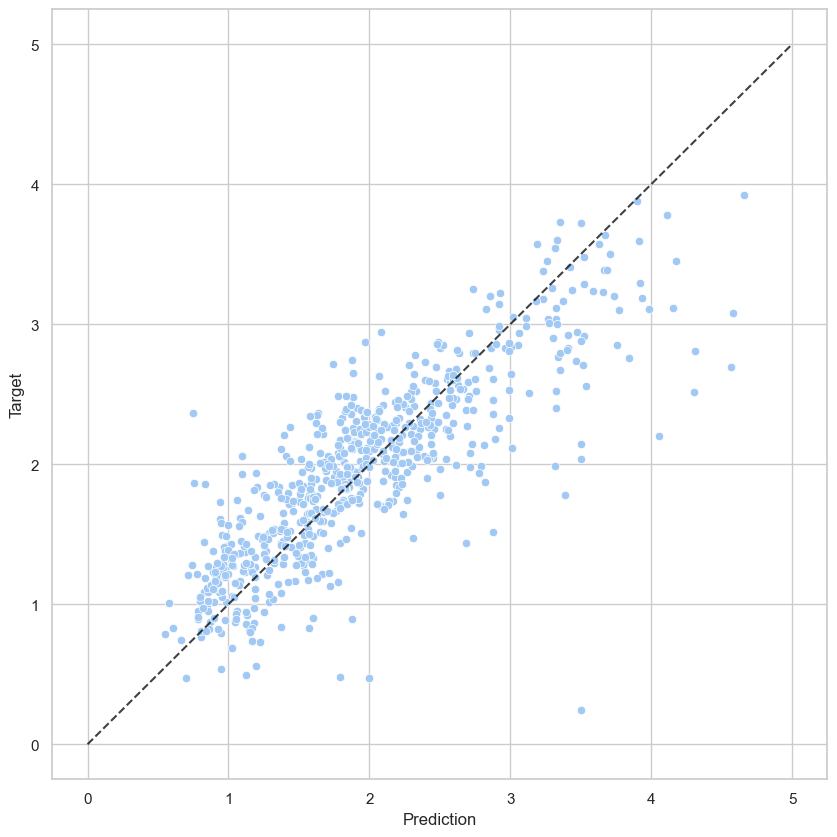

In [287]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

y_logits = np.array(lregressor.predict(x_train))
y_target = np.array(y_train)

sns.scatterplot(y=y_logits, x=y_target, ax=ax)
sns.lineplot(x=range(0, 6), y=range(0, 6), color='black', linestyle='--', alpha=0.75, ax=ax)

plt.xlabel('Prediction')
plt.ylabel('Target')
plt.show()

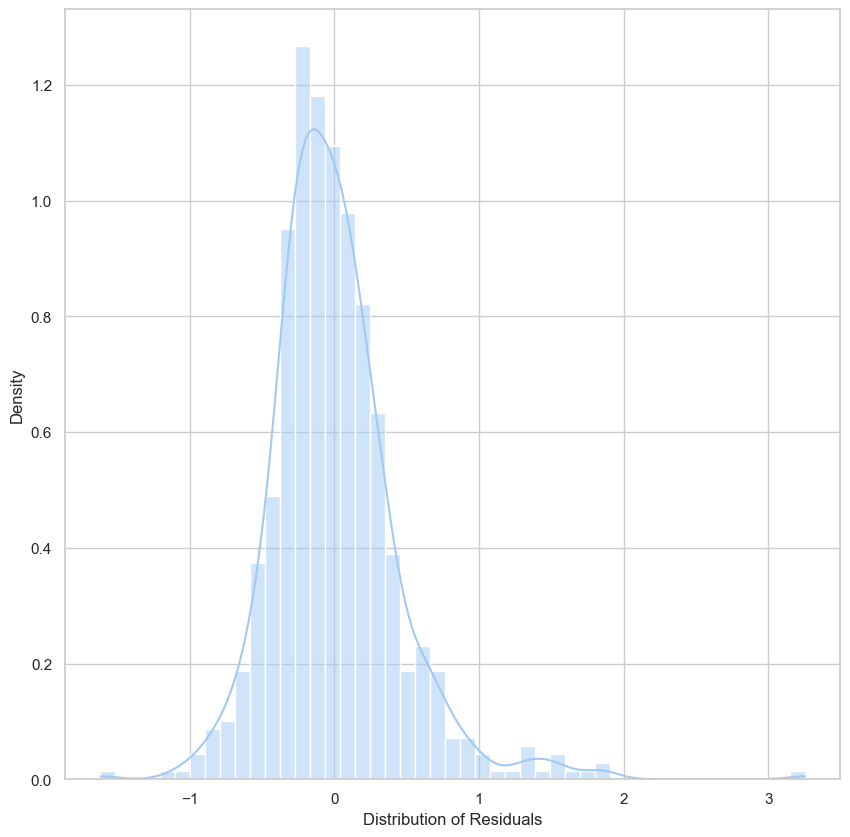

In [288]:
data = y_target - y_logits

figure, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.set_theme(style='whitegrid', palette='pastel')

residuals = sns.histplot(data, ax=ax, kde=True, stat='density')
residuals.set(xlabel='Distribution of Residuals')

plt.show()

In [289]:
def return_test(array, distribution, cdf):
    args = distribution.fit(array)
    
    kstest = scipy.stats.kstest(array, cdf=cdf, args=args).pvalue
    cramervonmises = scipy.stats.cramervonmises(array, cdf=cdf, args=args).pvalue
    
    print('Kolmogorov-Smirnov Test: {:.5f}'.format(kstest))
    print('Cramer–Von Mises Test: {:.5f}'.format(cramervonmises))

In [290]:
return_test(data, distribution=scipy.stats.alpha, cdf='alpha')

Kolmogorov-Smirnov Test: 0.02799
Cramer–Von Mises Test: 0.02763


In [291]:
def return_biplot(array, distribution):
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    args = distribution.fit(array)
    scipy.stats.probplot(array, dist=distribution, sparams=(args), plot=ax)
    
    ax.get_lines()[0].set_marker('o')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.show()

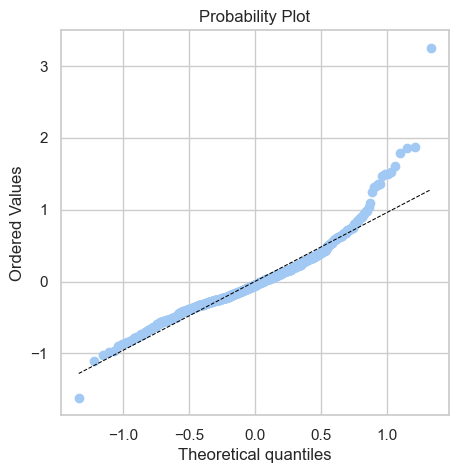

In [292]:
return_biplot(data, distribution=scipy.stats.norm)

In [293]:
mod = sm.OLS(y_train, x_train)
res = mod.fit()
    
df1 = pd.DataFrame(res.params)
df2 = pd.DataFrame(res.conf_int(0.05))
new_df = pd.concat([df1, df2], axis=1)
new_df.columns = ['params', 'bot_bound', 'top_bound']
    
new_df 

,params,bot_bound,top_bound
MedInc,0.358660,0.316261,0.401060
HouseAge,0.007746,0.004777,0.010715
AveRooms,0.072925,0.015581,0.130269
AveBedrms,0.042479,-0.493471,0.578430
Population,0.000149,0.000086,0.000211
AveOccup,-0.504875,-0.571569,-0.438182
Latitude,-0.253650,-0.325876,-0.181424
Longitude,-0.087802,-0.111536,-0.064067


In [294]:
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.models import BayesianModel
from pgmpy.sampling import BayesianModelSampling
import networkx as nx
from pgmpy.estimators import HillClimbSearch, K2Score, BicScore

In [295]:
df_new = df.copy()
df_new['MedInc'] = pd.qcut(df_new['MedInc'], 10, labels=False, duplicates="drop")
df_new['AveRooms'] = pd.qcut(df_new['AveRooms'], 10, labels=False, duplicates="drop")
df_new['AveBedrms'] = pd.qcut(df_new['AveBedrms'], 10, labels=False, duplicates="drop")
df_new['Population'] = pd.qcut(df_new['Population'], 10, labels=False, duplicates="drop")
df_new['AveOccup'] = pd.qcut(df_new['AveOccup'], 10, labels=False, duplicates="drop")
df_new['HouseAge'] = pd.qcut(df_new['HouseAge'], 10, labels=False, duplicates="drop")
df_new['Latitude'] = pd.qcut(df_new['HouseAge'], 10, labels=False, duplicates="drop")
df_new['Longitude'] = pd.qcut(df_new['HouseAge'], 10, labels=False, duplicates="drop")


In [296]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['HouseAge'])
df_new = encoder.fit_transform(df_new)

In [297]:
df_new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
2,9,1,9,6,1,6,6,6,3.521
3,8,1,7,6,1,4,6,6,3.413
4,6,1,8,7,1,1,6,6,3.422
5,6,1,3,8,0,1,6,6,2.697
6,5,1,4,0,5,1,6,6,2.992
...,...,...,...,...,...,...,...,...,...
1121,3,4,6,8,6,4,0,0,1.086
1122,1,4,7,8,1,3,0,0,1.049
1123,4,4,6,6,6,3,0,0,1.102
1124,0,6,5,4,3,2,0,0,1.038


In [298]:
kor_list = [
       ('MedInc', 'AveRooms'),
       ('AveRooms', 'target'),
       ('AveBedrms', 'AveOccup'),
       ('Population', 'AveOccup'),
       ('AveOccup', "target"),
       ('Latitude', 'Longitude'),
       ('Longitude', "AveOccup")
       ]

model = BayesianModel(kor_list)

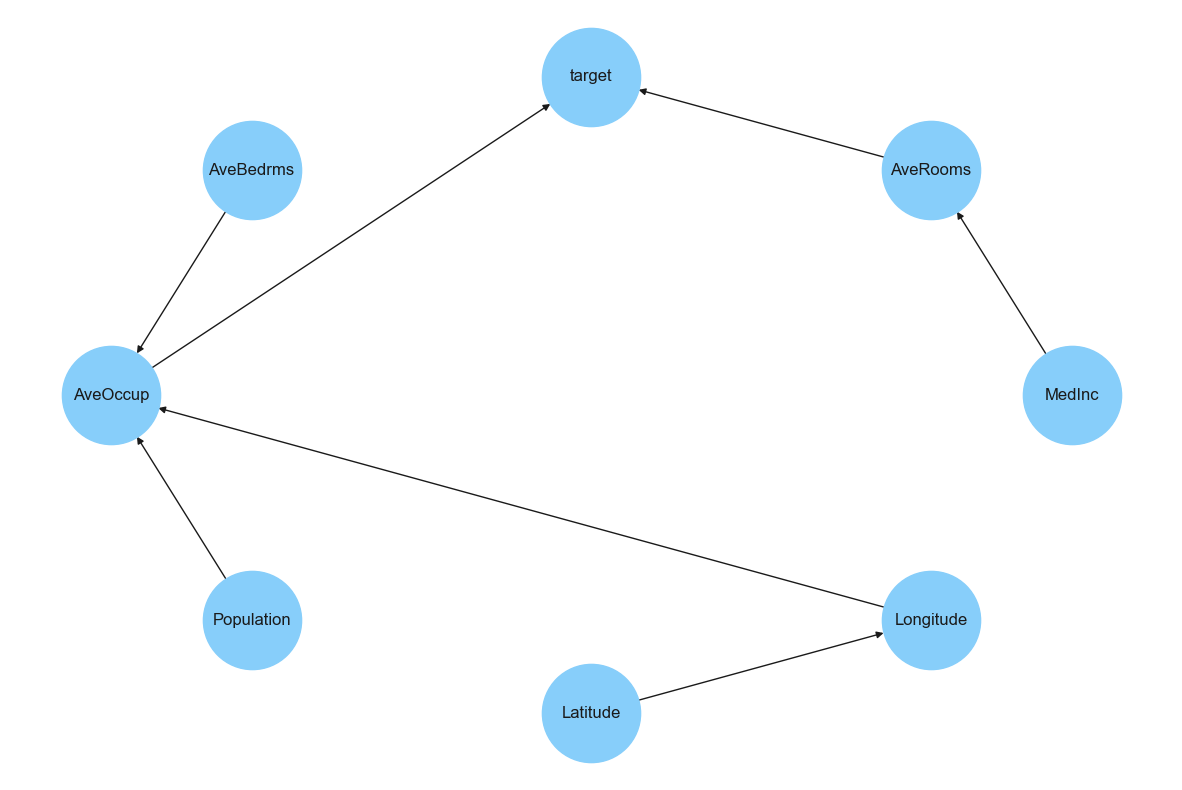

In [299]:
figure, ax = plt.subplots(1, 1, figsize=(15, 10))

graph = nx.DiGraph()
graph.add_edges_from(model.edges())

positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [300]:
hc_search = HillClimbSearch(data=df_new)
hc_k2 = hc_search.estimate(scoring_method=K2Score(df_new))
hc_bic = hc_search.estimate(scoring_method=BicScore(df_new))

  0%|          | 3/1000000 [00:00<30:55:32,  8.98it/s]


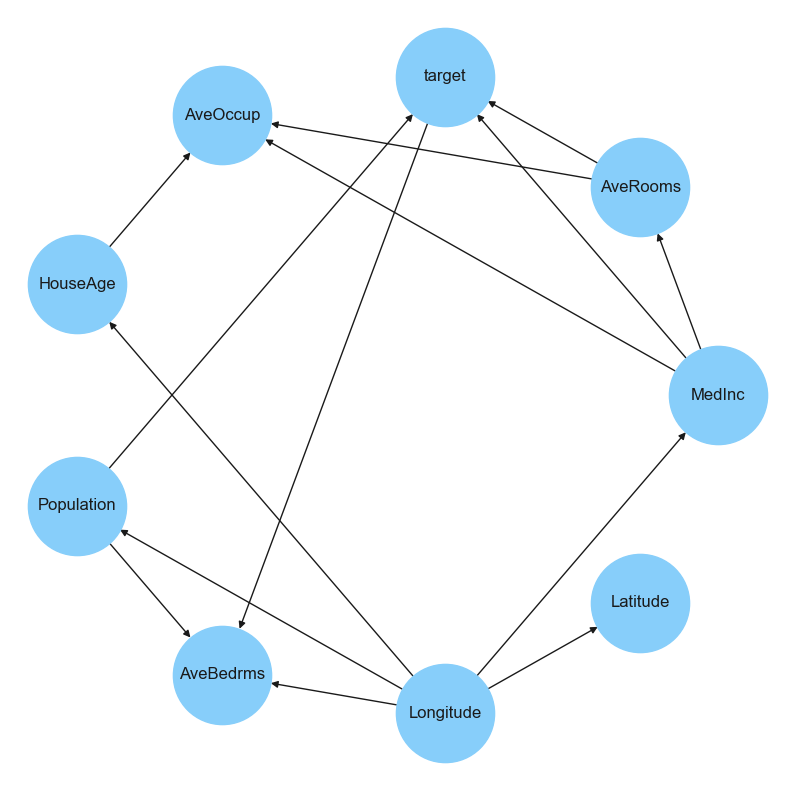

In [301]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_k2.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

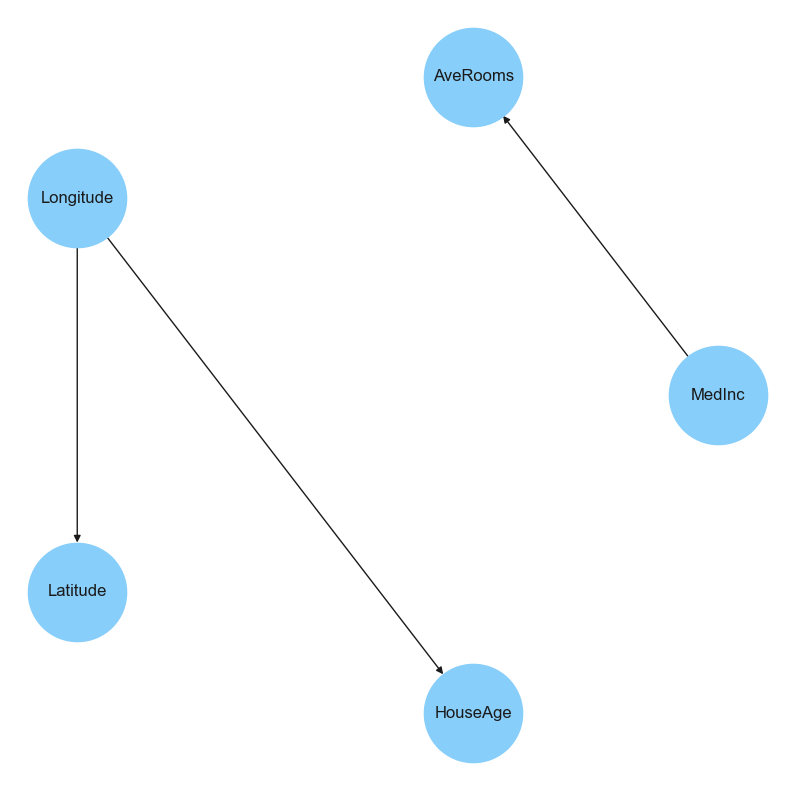

In [302]:
figure, ax = plt.subplots(1, 1, figsize=(10, 10))

graph = nx.DiGraph()
graph.add_edges_from(hc_bic.edges())
positions = nx.layout.circular_layout(graph)
nx.draw(graph, positions, with_labels=True, node_color='lightskyblue', node_size=5000)

plt.show()

In [303]:
def bn_sample(model, data):
    model_s = BayesianModel(model.edges())
    model_s.fit(data)
    
    sampling = BayesianModelSampling(model_s)
    sample = sampling.forward_sample(size = data.shape[0])
    return sample


In [304]:
sample_k2 = bn_sample(hc_k2, df_new)
sample_model = bn_sample(model, df_new)


Generating for node: target: 100%|██████████| 8/8 [00:00<00:00, 67.23it/s]


In [305]:
mae_k2 = mean_absolute_error(df_new.target, sample_k2.target)
mse_k2 = mean_squared_error(df_new.target, sample_k2.target)
r2_k2 = r2_score(df_new.target, sample_k2.target)

print('Mean Absolute Error: {:.3f}'.format(mae_k2))
print('Mean Squared Error: {:.3f}'.format(mse_k2))
print('R2 Score: {:.3f}'.format(r2_k2))

Mean Absolute Error: 0.921
Mean Squared Error: 1.330
R2 Score: -1.126


In [306]:
mae_model = mean_absolute_error(df_new.target, sample_model.target)
mse_model = mean_squared_error(df_new.target, sample_model.target)
r2_model = r2_score(df_new.target, sample_model.target)

print('Mean Absolute Error: {:.3f}'.format(mae_model))
print('Mean Squared Error: {:.3f}'.format(mse_model))
print('R2 Score: {:.3f}'.format(r2_model))


Mean Absolute Error: 0.906
Mean Squared Error: 1.290
R2 Score: -1.063


In [307]:
df_int = pd.DataFrame(columns = ['value','bot_bound','top_bound'])
list_bot_int = []
list_top_int = []
n = len(sample_model.target)
p = 2
scale = ((sample_model.target - df_new.target)**2).sum()/n

for loc in sample_model.target:
    conf_int = scipy.stats.t.interval(0.05, df=n-p, loc=loc, scale=scale)
    list_bot_int.append(conf_int[0])
    list_top_int.append(conf_int[1])

df_int['value'] = sample_model.target
df_int['bot_bound'] = list_bot_int
df_int['top_bound'] = list_top_int
    
df_int


,value,bot_bound,top_bound
0,1.448,1.374371,1.521629
1,1.353,1.279371,1.426629
2,1.406,1.332371,1.479629
3,1.932,1.858371,2.005629
4,1.303,1.229371,1.376629
...,...,...,...
995,2.545,2.471371,2.618629
996,2.185,2.111371,2.258629
997,1.875,1.801371,1.948629
998,4.310,4.236371,4.383629
